In [51]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
ride_data_df = pd.read_csv(ride_data_to_load, low_memory=False) 
city_data_df = pd.read_csv(city_data_to_load, low_memory=False) 

In [52]:
# Combine the data into a single dataset 2375 rows
merge_df = pd.merge(ride_data_df, city_data_df, how='left', on='city')

In [53]:
# Data for City Type (Urban, Suburban, Rural)
urban_df = merge_df[merge_df['type']=='Urban']
suburban_df = merge_df[merge_df['type']=='Suburban']
rural_df = merge_df[merge_df['type']=='Rural']

In [54]:
 # Average Fare ($) Per City
urban_fares = urban_df.groupby(['city']).mean()['fare']  
suburban_fares = suburban_df.groupby(['city']).mean()['fare']
rural_fares = rural_df.groupby(['city']).mean()['fare']

# Total Number of Rides Per City
urban_rides = urban_df.groupby(['city']).count()['ride_id']  
suburban_rides = suburban_df.groupby(['city']).count()['ride_id']
rural_rides = rural_df.groupby(['city']).count()['ride_id']

# Total Number of Drivers Per City
urban_drivers = urban_df.groupby(['city']).mean()['driver_count']
suburban_drivers = suburban_df.groupby(['city']).mean()['driver_count']
rural_drivers = rural_df.groupby(['city']).mean()['driver_count']

## Bubble Plot of Ride Sharing Data

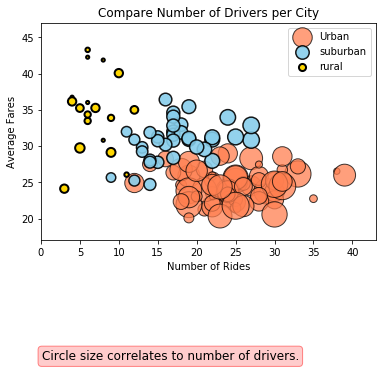

<Figure size 432x288 with 0 Axes>

In [55]:
# Build the scatter plots for each city types
plt.scatter(urban_rides, 
           urban_fares,
           s=10*urban_drivers, c='coral',
           edgecolor = 'black', linewidth=1, marker='o',
           alpha=0.75, label='Urban')
plt.scatter(suburban_rides, 
           suburban_fares,
           s=10*suburban_rides, c='SkyBlue',
           edgecolor = 'black', linewidth=1.5, marker='o',
           alpha=0.9, label='suburban')
plt.scatter(rural_rides, 
           rural_fares,
           s=10*rural_drivers, c='gold',
           edgecolor = 'black', linewidth=2, marker='o',
           alpha=1, label='rural')
# The x and y limits of our scatter plot 
plt.xlim(0, 43)
plt.ylim(17, 47)

# Set a Title and labels, legend, note
plt.title("Compare Number of Drivers per City")
plt.xlabel("Number of Rides")
plt.ylabel("Average Fares")
plt.legend()
plt.text(0.1, 0.1, "Circle size correlates to number of drivers.", size=12, rotation=0.,
         ha="left", va="bottom", bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5),
        fc=(1., 0.8, 0.8)))
plt.show() #Show figure
plt.savefig('Scatter.png')  # Save Figure

## Total Fares by City Type

In [56]:
# Total Fare ($) Per City Type
urban_tot = urban_df.sum()['fare']
suburban_tot = suburban_df.sum()['fare']
rural_tot = rural_df.sum()['fare']
tot = merge_df.sum()['fare']

# Total % Per City  Type p=percent
urban_p = urban_tot/tot
suburban_p = suburban_tot/tot
rural_p = rural_tot/tot

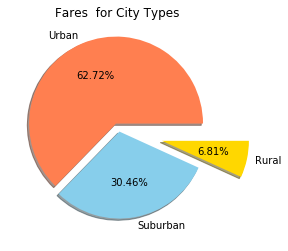

<Figure size 432x288 with 0 Axes>

In [57]:
# Total Fare ($) Per City  Type
urban_tot = urban_df.groupby(['city']).sum()['fare']  
suburban_tot = suburban_df.groupby(['city']).sum()['fare']
rural_tot = rural_df.groupby(['city']).sum()['fare']

# Build Pie Chart
# Labels for the sections of our pie chart
types = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [urban_p, suburban_p, rural_p]

# The colors of each section of the pie chart
colors = ["coral", "skyblue", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0.5)

# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=types, colors=colors, shadow=True, autopct="%1.2f%%", startangle=0)
plt.title("Fares  for City Types ")
plt.show()  #Show figure
plt.savefig('Fare_pie.png')  # Save Figure

## Total Rides by City Type

In [58]:
# Calculate Ride Percents  
# Total Number of Rides Per City Type
urban_rides_tot = urban_rides.sum()
suburban_rides_tot = suburban_rides.sum() 
rural_rides_tot = rural_rides.sum()  
all_rides_tot = urban_rides_tot+suburban_rides_tot+rural_rides_tot

# Calculate Ride Percents  (fix percentage arry to sum)
urban_RP = urban_rides_tot/all_rides_tot 
suburban_RP = suburban_rides_tot/all_rides_tot
rural_RP = rural_rides_tot/all_rides_tot

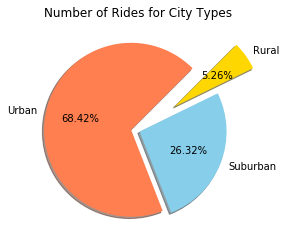

<Figure size 432x288 with 0 Axes>

In [59]:
# Build Pie Chart
# Labels for the sections of our pie chart
types = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [urban_RP, suburban_RP, rural_RP]

# The colors of each section of the pie chart
colors = ["coral", "skyblue", "gold"]

# Tells matplotlib to seperate the sections 
explode = (0.1, 0, 0.5)
plt.title("Number of Rides for City Types ")

# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=types, colors=colors, shadow=True, autopct="%1.2f%%", startangle=45)
plt.show()  #Show figure
plt.savefig('Ride_pie.png')  # Save Figure

## Total Drivers by City Type

In [60]:
# Calculate total drivers per City Type
urban_drivers_tot = urban_drivers.sum()
suburban_drivers_tot = suburban_drivers.sum()
rural_drivers_tot = rural_drivers.sum()
tot = urban_drivers_tot+suburban_drivers_tot+rural_drivers_tot

# Total % Per City  Type p=percent
urban_drivers_p = urban_drivers_tot/tot
suburban_drivers_p = suburban_drivers_tot/tot
rural_drivers_p = rural_drivers_tot/tot

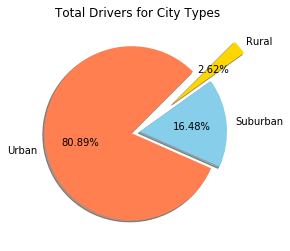

<Figure size 432x288 with 0 Axes>

In [61]:
# Build Pie Chart
# Labels for the sections of our pie chart
types = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [urban_drivers_p, suburban_drivers_p, rural_drivers_p]

# The colors of each section of the pie chart
colors = ["coral", "skyblue", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0.5)

plt.title("Total Drivers for City Types ")

# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=types, colors=colors, shadow=True, autopct="%1.2f%%", startangle=45)
plt.show()  #Show figure
plt.savefig('Driver_pie.png')
